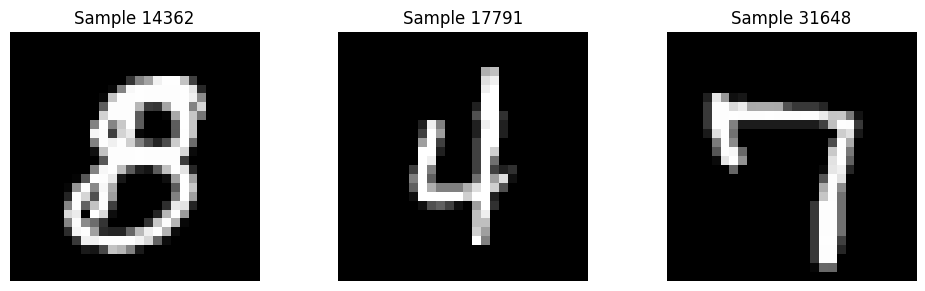

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_mnist_data_local():
    """
    Prepares the MNIST dataset for training and visualization using a local .npz file.
    """
    # Load MNIST dataset from local file
    data = np.load("../data/mnist.npz")
    x_train, y_train = data["x_train"], data["y_train"]
    x_test, y_test = data["x_test"], data["y_test"]

    
    # Normalize the images between 0 and 1
    x_visual = x_train.astype("float32") / 255.0  # For visualization purposes
    x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255
    x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255

    # Create training and test pairs without labels (unsupervised learning)
    training_data = [(x.reshape(784, 1),x.reshape(784, 1) ) for x in x_train]
    test_data = [(x.reshape(784, 1),x.reshape(784, 1) ) for x in x_test]

    return training_data, test_data, x_visual

# Load the training, test data, and visual data
training_data, test_data, x_visual = prepare_mnist_data_local()

# Pick 3 random indices
random_indices = np.random.choice(len(x_visual), 3, replace=False)

# Plot the images
plt.figure(figsize=(10, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_visual[idx], cmap="gray")
    plt.title(f"Sample {idx}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [2]:
if 0>1:
    import os
    import numpy as np
    import pickle
    import matplotlib.pyplot as plt
    from keras.datasets import cifar10

    def download_and_prepare_cifar10():
        """
        Downloads CIFAR-10 and saves it as a local .npz file in ../data/.
        If already downloaded, it loads it from the local file.
        """
        cifar_path = "../data/cifar10.npz"
        if not os.path.exists(cifar_path):
            # Download CIFAR-10
            (x_train, y_train), (x_test, y_test) = cifar10.load_data()

            # Save as .npz
            np.savez(cifar_path, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
            print(f"CIFAR-10 downloaded and saved to {cifar_path}")
        else:
            print(f"Loading CIFAR-10 from {cifar_path}")
        
        # Load the dataset
        data = np.load(cifar_path)
        x_train, y_train = data["x_train"], data["y_train"]
        x_test, y_test = data["x_test"], data["y_test"]

        # Normalize for visualization and training
        x_visual = x_train.astype("float32") / 255.0  # For visualization
        x_train = x_train.reshape(-1, 32 * 32 * 3).astype("float32") / 255
        x_test = x_test.reshape(-1, 32 * 32 * 3).astype("float32") / 255

        # Create training and test pairs
        training_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in x_train]
        test_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in x_test]

        return training_data, test_data, x_visual

    # Load and visualize CIFAR-10 data
    training_data, test_data, x_visual = download_and_prepare_cifar10()
    random_indices = np.random.choice(len(x_visual), 3, replace=False)

    plt.figure(figsize=(10, 3))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(x_visual[idx])
        plt.title(f"Sample {idx}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [3]:
if 0> 1:
    from keras.datasets import fashion_mnist

    def download_and_prepare_fashion_mnist():
        """
        Downloads Fashion-MNIST and saves it as a local .npz file in ../data/.
        If already downloaded, it loads it from the local file.
        """
        fashion_path = "../data/fashion_mnist.npz"
        if not os.path.exists(fashion_path):
            # Download Fashion-MNIST
            (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

            # Save as .npz
            np.savez(fashion_path, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
            print(f"Fashion-MNIST downloaded and saved to {fashion_path}")
        else:
            print(f"Loading Fashion-MNIST from {fashion_path}")
        
        # Load the dataset
        data = np.load(fashion_path)
        x_train, y_train = data["x_train"], data["y_train"]
        x_test, y_test = data["x_test"], data["y_test"]

        # Normalize for visualization and training
        x_visual = x_train.astype("float32") / 255.0  # For visualization
        x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255
        x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255

        # Create training and test pairs
        training_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in x_train]
        test_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in x_test]

        return training_data, test_data, x_visual

    # Load and visualize Fashion-MNIST data
    training_data, test_data, x_visual = download_and_prepare_fashion_mnist()
    random_indices = np.random.choice(len(x_visual), 3, replace=False)

    plt.figure(figsize=(10, 3))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(x_visual[idx], cmap="gray")
        plt.title(f"Sample {idx}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [4]:
print(training_data[0][0].shape)


(784, 1)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from core.activation_function import ActivationFunction
from core.optimizer import Optimizer
from core.vae import VAE

# Define the encoder and decoder topologies
latent_dim = 8 # Size of the latent space
encoder_topology = [28*28, 256, 128, 2 * latent_dim]
decoder_topology = [latent_dim, 128, 256, 28*28]


# Configure separate optimizers for encoder and decoder
encoder_optimizer = Optimizer(
    method="adam",
    eta=0.001  # Learning rate
)

decoder_optimizer = Optimizer(
    method="adam",
    eta=0.001  # Learning rate
)

# Configure the activation function
activation_function = ActivationFunction(
    method="relu"
)

# Create the VAE model
vae = VAE(
    seed=42,
    encoder_topology=encoder_topology,
    decoder_topology=decoder_topology,
    activation_function=activation_function,
    encoder_optimizer=encoder_optimizer,
    decoder_optimizer=decoder_optimizer
)

# Train the model
vae.fit(
    training_data=training_data,
    epochs=20,  # Adjust epochs as needed
    mini_batch_size=16,
)

# Select a test sample
test_sample, _ = test_data[0]
recon_x, _, _, _, _, _, _, _, _ = vae.feedforward(test_sample)

# Visualize the original and reconstructed images
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(test_sample.reshape(28, 28), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(recon_x.reshape(28, 28), cmap="gray")
plt.title("Reconstructed")
plt.axis("off")

plt.show()


Epoch 1/20 complete with average loss: 222.14532057552034
Epoch 2/20 complete with average loss: 171.0742733916268
Epoch 3/20 complete with average loss: 159.54615927348792
Epoch 4/20 complete with average loss: 153.978003669124
Epoch 5/20 complete with average loss: 150.58303282450598
Epoch 6/20 complete with average loss: 147.9382666553793
Epoch 7/20 complete with average loss: 145.99451560801202


KeyboardInterrupt: 

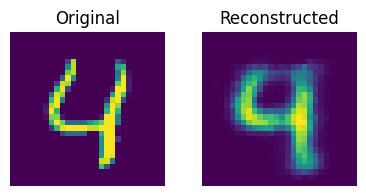

In [25]:
test_sample, _ = test_data[4]
recon_x, _, _, _, _, _, _, _, _ = vae.feedforward(test_sample)


# Visualize the original and reconstructed images
plt.figure(figsize=(4, 2))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(test_sample.reshape(28, 28))  # Reshape for CIFAR-10
plt.title("Original")
plt.axis("off")

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(recon_x.reshape(28, 28))  # Reshape for CIFAR-10
plt.title("Reconstructed")
plt.axis("off")

plt.tight_layout()
plt.show()


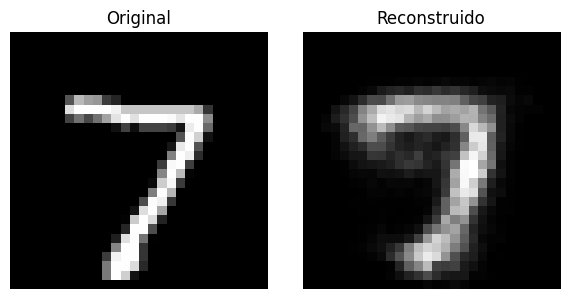

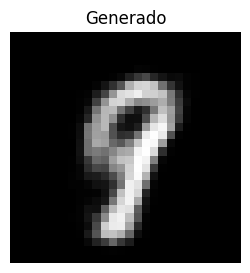

In [18]:
# Usamos un ejemplo del conjunto de test para feedforward
test_sample, _ = test_data[0]

# Pasar el test_sample por el modelo VAE
recon_x, mu, log_var, z, epsilon, _, _, _, _ = vae.feedforward(test_sample)

# Visualizar la imagen original y la reconstruida
plt.figure(figsize=(6, 3))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(test_sample.reshape(28, 28), cmap="gray")
plt.title("Original")
plt.axis("off")

# Imagen reconstruida
plt.subplot(1, 2, 2)
plt.imshow(recon_x.reshape(28, 28), cmap="gray")
plt.title("Reconstruido")
plt.axis("off")

plt.tight_layout()
plt.show()

# Generar una nueva imagen aleatoria desde el espacio latente
z_random = np.random.normal(size=(vae.latent_dim, 1))  # Vector aleatorio en el espacio latente
generated_x, _, _ = vae.decode(z_random)  # Decodificar desde el vector latente

# Visualizar la imagen generada
plt.figure(figsize=(3, 3))
plt.imshow(generated_x.reshape(28, 28), cmap="gray")
plt.title("Generado")
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Generar una nueva muestra aleatoria del espacio latente
z = np.random.normal(size=(2, 1))  # Dimensión del espacio latente = 2
new_sample = vae.generate(z)

# Reconstruir la imagen para visualizarla
new_sample_image = new_sample.reshape(28, 28)

# Mostrar la imagen generada
plt.imshow(new_sample_image, cmap='gray')
plt.title("Imagen generada")
plt.axis('off')
plt.show()


AttributeError: 'VAE' object has no attribute 'generate'

In [ ]:
# Tomar algunas imágenes del conjunto de prueba
test_samples = x_test[:10]

# Reconstruir las imágenes
reconstructed_samples = [vae.feedforward(x)[0] for x in test_samples]

# Mostrar las originales y las reconstruidas
fig, axes = plt.subplots(2, 10, figsize=(15, 3))

for i in range(10):
    # Mostrar la imagen original
    axes[0, i].imshow(test_samples[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')

    # Mostrar la imagen reconstruida
    axes[1, i].imshow(reconstructed_samples[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.show()


In [ ]:
total_loss = 0
reconstruction_loss = 0
kl_divergence = 0

for x in x_test:
    recon_x, mu, log_var, _, _ = vae.feedforward(x)
    loss, rec_loss, kl_loss = vae.cost_function(x, recon_x, mu, log_var)
    total_loss += loss
    reconstruction_loss += rec_loss
    kl_divergence += kl_loss

n = len(x_test)
print(f"Pérdida total promedio: {total_loss / n}")
print(f"Pérdida de reconstrucción promedio: {reconstruction_loss / n}")
print(f"Divergencia KL promedio: {kl_divergence / n}")


In [ ]:
latent_points = []
labels = []

# Mapear las imágenes del conjunto de prueba al espacio latente
for x in x_test[:1000]:
    _, mu, _, _, _ = vae.feedforward(x)
    latent_points.append(mu)
    labels.append(np.argmax(x))  # Opcional: etiqueta de clase para colorear

latent_points = np.array(latent_points)

# Graficar el espacio latente
plt.scatter(latent_points[:, 0], latent_points[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("Representación en el espacio latente")
plt.xlabel("Latente 1")
plt.ylabel("Latente 2")
plt.show()


In [ ]:
# Definir dos puntos en el espacio latente
z1 = np.array([[-1.0], [-1.0]])
z2 = np.array([[1.0], [1.0]])

# Generar interpolación lineal
interpolations = [z1 + (z2 - z1) * t for t in np.linspace(0, 1, num=10)]

# Reconstruir y mostrar las imágenes correspondientes
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i, z in enumerate(interpolations):
    generated_image = vae.generate(z).reshape(28, 28)
    axes[i].imshow(generated_image, cmap='gray')
    axes[i].axis('off')

plt.title("Interpolación en el espacio latente")
plt.show()
